# VapoRock
* A thermodynamic model for vaporized silicate rocks & melts relevant to magma ocean atmospheres and stellar nebula

In [2]:
import vaporock

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler
from thermoengine import model

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See http

In [3]:
import IPython
print(IPython.__version__)
print(pd.__version__)

8.10.0
1.5.3


Define the compostion of the melt in terms of oxides

In [4]:
# melt_comp_wts = {'MgO':36.9, 'CaO':3.3, 'Al2O3':4.6, 'SiO2':50.7, 
#                  'Na2O':3e-7, 'K2O':3e-10, 'FeO':3.5}

# BSE composition from Schaefer & Fegley (TiO2 neglected)
melt_comp_wts = {'SiO2':45.97, 'MgO':36.66, 'Al2O3':4.77, 'FeO':8.24, 
                 'CaO':3.78, 'Na2O':0.35, 'K2O':0.04}


Now, calculate the corresponding melt compostion is calculated using MELTS from thermoengine after the mantle has been melted

In [5]:
system = vaporock.System(vapor_database='JANAF0')
# system = vaporock.System(vapor_database='LAMOR')
system.set_melt_comp(melt_comp_wts)
system.print_melt_comp()

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See http

MELTS liquid components:


[('SiO2', 0.17905092548091792),
 ('TiO2', 0.0),
 ('Al2O3', 0.046357815686249346),
 ('Fe2O3', 0.0),
 ('MgCr2O4', 0.0),
 ('Fe2SiO4', 0.057344557277748086),
 ('MnSi0.5O2', 0.0),
 ('Mg2SiO4', 0.4547890552892488),
 ('NiSi0.5O2', 0.0),
 ('CoSi0.5O2', 0.0),
 ('CaSiO3', 0.0674044301472555),
 ('Na2SiO3', 0.00564707947570578),
 ('KAlSiO4', 0.0008492983733812904),
 ('Ca3(PO4)2', 0.0),
 ('H2O', 0.0)]

In [60]:
T = np.linspace(1500,3000,101)
P = 1e-10 #In bars, intital surface pressure
buffer = 'IW' # Iron-Wusite buffer
DlogfO2 = +1.5
DlogfO2 = -1.5
g=36.2
logfO2 = vaporock.redox_buffer(T, buffer=buffer, dlogfO2=DlogfO2) #Oxygen fugacity for given temperature range and Pressure

# Optionally choose calculation method based on chemical potentials, both agree (method=['activity','chempot'])
logP, lnK, lna =  system.eval_gas_abundances(T, logfO2, full_output=True, method='activity')
print(logP)

density = system.calc_column_density(logP, logfO2, g)
density_high = system.get_abundant_species(density, N=20)
mol_elem_frac, Ptotal = system.calc_gas_props(T, logP)




/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

                 1500.0     1515.0     1530.0     1545.0     1560.0  \
species_name                                                          
O(g)         -11.943176 -11.764964 -11.590276 -11.419010 -11.251067   
O2(g)        -13.101927 -12.920790 -12.743291 -12.569323 -12.398783   
Mg(g)         -8.598675  -8.435417  -8.275599  -8.119119  -7.965879   
MgO(g)       -13.822638 -13.595177 -13.372401 -13.154172 -12.940359   
Mg2(g)       -20.776958 -20.461087 -20.151993 -19.849474 -19.553334   
Ca(g)        -14.810952 -14.602668 -14.398698 -14.198913 -14.003190   
CaO(g)       -18.877084 -18.614661 -18.358117 -18.107251 -17.861874   
Ca2(g)       -32.430339 -32.025642 -31.629422 -31.241427 -30.861413   
Al(g)        -16.435111 -16.183119 -15.936190 -15.694176 -15.456933   
AlO(g)       -16.503225 -16.251780 -16.005420 -15.763995 -15.527359   
AlO2(g)      -21.070956 -20.779489 -20.493925 -20.214091 -19.939818   
Al2(g)       -31.880292 -31.435856 -31.000386 -30.573618 -30.155299   
Al2O(g

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

Chaning the fo2

In the above example fo2 was represnted by the pm 1.5 value, i want to explore a range of fo2 values so will start by doubling it

In [7]:
help(system.calc_gas_props)

Help on method calc_gas_props in module vaporock.equil:

calc_gas_props(T, logP) method of vaporock.equil.System instance



In [69]:
T1 = np.linspace(1500,3000,101)
P1 = 1e-10 #In bars, intital surface pressure
buffer = 'IW' # Iron-Wusite buffer
dlogfO2 = [-4,-3,-2,-1,0,1,2,3,4,5,6,7]
g=9.81
LogfO21=np.zeros((len(T),len(dlogfO2)))
LOGP1 = np.zeros((len(T1),len(dlogfO2),34))
Ptotal1=np.zeros((len(T1),len(dlogfO2)))
density1=np.zeros((len(T1),len(dlogfO2),34))
density_high1=np.zeros((len(T1),len(dlogfO2),20))
print(Ptotal1.shape,density1.shape)
mol_elem_frac1=np.zeros((len(T1),len(dlogfO2),10))
print(mol_elem_frac1.shape)
print('LOGP1', LOGP1.shape)
#Ptotal1[5,5]
AS =[]
for j in range(len(dlogfO2)):
        logfO21 = vaporock.redox_buffer(T1, buffer=buffer, dlogfO2=dlogfO2[j]) #Oxygen fugacity for given temperature range and Pressure
        LogfO21[:,j]=logfO21
        #print(i,logfO2)
        logP1, lnk1, lna1 =  system.eval_gas_abundances(T1, logfO21, full_output=True, method='activity')
        LOGP1a = np.array(logP1)
        LOGP1aT= np.transpose(LOGP1a)
        print('LOGP1a =' , LOGP1a.shape)
        LOGP1[:,j,:] = LOGP1aT
        CD=np.array(system.calc_column_density(logP1, logfO21, g))
        print(CD.shape)
        CDT=np.transpose(CD)
        density1[:,j,:] = CDT
        AS = (system.get_abundant_species(system.calc_column_density(logP1, logfO21, g), N=20))
        AST = np.transpose(AS)
        density_high1[:,j,:] = AST
        MEF ,PTOTAL = (system.calc_gas_props(T1, logP1))
        print(MEF)
        MEFA=np.array(MEF)
        MEFT = np.transpose(MEFA)
        print(MEFA.shape)
        mol_elem_frac1[:,j,:]=MEFT
            #print(mol_elem_frac1)
        Ptotal1[:,j]= np.array(np.sum(10**logP1, axis=0))
        #density1.shape
print('LOGP1a =' , LOGP1a.shape)
#print(MEFA.shape)
#print(density1)       

(101, 12) (101, 12, 34)
(101, 12, 10)
LOGP1 (101, 12, 34)


/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

LOGP1a = (34, 101)
(34, 101)
          1500.0        1515.0        1530.0        1545.0        1560.0  \
O   3.370622e-03  3.992745e-03  4.710551e-03  5.535322e-03  6.479111e-03   
Mg  2.028866e-03  2.324868e-03  2.654085e-03  3.018790e-03  3.421217e-03   
Ca  1.244453e-09  1.581791e-09  1.999024e-09  2.512128e-09  3.139592e-09   
Al  1.307245e-10  1.837533e-10  2.563682e-10  3.550760e-10  4.882911e-10   
Si  3.367747e-03  3.989431e-03  4.706744e-03  5.530966e-03  6.474144e-03   
Na  8.608590e-01  8.533797e-01  8.455130e-01  8.372472e-01  8.285712e-01   
K   4.554190e-02  4.558310e-02  4.559034e-02  4.556263e-02  4.549902e-02   
Fe  8.483184e-02  9.073014e-02  9.682526e-02  1.031050e-01  1.095553e-01   
Ti  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Cr  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

          1575.0        1590.0        1605.0        1620.0        1635.0  ...  \
O   7.554704e-03  8.775564e-03  1.015575e-02  1.17098

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

LOGP1a = (34, 101)
(34, 101)
          1500.0        1515.0        1530.0        1545.0        1560.0  \
O   1.980095e-03  2.353439e-03  2.786430e-03  3.286684e-03  3.862476e-03   
Mg  1.189641e-03  1.367846e-03  1.567180e-03  1.789349e-03  2.036088e-03   
Ca  7.297018e-10  9.306633e-10  1.180396e-09  1.489052e-09  1.868512e-09   
Al  4.737119e-11  6.680509e-11  9.352803e-11  1.300143e-10  1.794871e-10   
Si  1.974747e-03  2.347252e-03  2.779298e-03  3.278490e-03  3.853094e-03   
Na  8.976233e-01  8.928543e-01  8.878177e-01  8.825006e-01  8.768895e-01   
K   4.748685e-02  4.769165e-02  4.787144e-02  4.802533e-02  4.815234e-02   
Fe  4.974535e-02  5.338556e-02  5.717796e-02  6.111958e-02  6.520647e-02   
Ti  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Cr  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

          1575.0        1590.0        1605.0        1620.0        1635.0  ...  \
O   4.522759e-03  5.277160e-03  6.135976e-03  7.11015

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

LOGP1a = (34, 101)
(34, 101)
          1500.0        1515.0        1530.0        1545.0        1560.0  \
O   1.147717e-03  1.366706e-03  1.621456e-03  1.916745e-03  2.257820e-03   
Mg  6.854433e-04  7.897357e-04  9.068002e-04  1.037762e-03  1.183789e-03   
Ca  4.204501e-10  5.373440e-10  6.830260e-10  8.636378e-10  1.086414e-09   
Al  1.972609e-11  2.786846e-11  3.909091e-11  5.445188e-11  7.533622e-11   
Si  1.137882e-03  1.355301e-03  1.608276e-03  1.901564e-03  2.240389e-03   
Na  9.197053e-01  9.166932e-01  9.135136e-01  9.101564e-01  9.066109e-01   
K   4.865506e-02  4.896501e-02  4.925699e-02  4.953036e-02  4.978444e-02   
Fe  2.866859e-02  3.083004e-02  3.309289e-02  3.545722e-02  3.792266e-02   
Ti  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Cr  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

          1575.0        1590.0        1605.0        1620.0        1635.0  ...  \
O   2.650422e-03  3.100803e-03  3.615744e-03  4.20256

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

LOGP1a = (34, 101)
(34, 101)
          1500.0        1515.0        1530.0        1545.0        1560.0  \
O   6.672904e-04  7.951949e-04  9.442056e-04  1.117210e-03  1.317397e-03   
Mg  3.908587e-04  4.508686e-04  5.183653e-04  5.940414e-04  6.786237e-04   
Ca  2.397755e-10  3.068091e-10  3.904948e-10  4.944370e-10  6.228985e-10   
Al  1.076539e-11  1.522179e-11  2.137089e-11  2.979795e-11  4.127044e-11   
Si  6.489931e-04  7.739326e-04  9.195785e-04  1.088775e-03  1.284669e-03   
Na  9.325965e-01  9.306545e-01  9.286137e-01  9.264674e-01  9.242082e-01   
K   4.933705e-02  4.971076e-02  5.007120e-02  5.041801e-02  5.075077e-02   
Fe  1.635930e-02  1.761473e-02  1.893291e-02  2.031459e-02  2.176030e-02   
Ti  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Cr  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

          1575.0        1590.0        1605.0        1620.0        1635.0  ...  \
O   1.548281e-03  1.813714e-03  2.117909e-03  2.46545

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

LOGP1a = (34, 101)
(34, 101)
          1500.0        1515.0        1530.0        1545.0        1560.0  \
O   4.054729e-04  4.829054e-04  5.731128e-04  6.778556e-04  7.990849e-04   
Mg  2.215420e-04  2.557319e-04  2.942327e-04  3.374540e-04  3.858283e-04   
Ca  1.359485e-10  1.740821e-10  2.217380e-10  2.809957e-10  3.543200e-10   
Al  7.907245e-12  1.118505e-11  1.571043e-11  2.191610e-11  3.037017e-11   
Si  3.681084e-04  4.392904e-04  5.223624e-04  6.189835e-04  7.309942e-04   
Na  9.399835e-01  9.386680e-01  9.372963e-01  9.358641e-01  9.343667e-01   
K   4.972784e-02  5.013880e-02  5.053937e-02  5.092938e-02  5.130860e-02   
Fe  9.293525e-03  1.001531e-02  1.077467e-02  1.157228e-02  1.240876e-02   
Ti  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Cr  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

          1575.0        1590.0        1605.0        1620.0        1635.0  ...  \
O   9.389554e-04  1.099839e-03  1.284341e-03  1.49530

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/Documents/vaporock/src/vaporock/equil.py:241: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  density = P_species*Navogad

LOGP1a = (34, 101)
(34, 101)
          1500.0        1515.0        1530.0        1545.0        1560.0  \
O   3.276659e-04  3.898615e-04  4.622920e-04  5.463737e-04  6.436788e-04   
Mg  1.251376e-04  1.445053e-04  1.663292e-04  1.908462e-04  2.183070e-04   
Ca  7.686485e-11  9.847576e-11  1.255031e-10  1.591370e-10  2.007906e-10   
Al  7.009025e-12  9.917109e-12  1.393348e-11  1.944328e-11  2.695256e-11   
Si  2.083784e-04  2.487944e-04  2.959957e-04  3.509379e-04  4.146836e-04   
Na  9.441061e-01  9.431367e-01  9.421342e-01  9.410954e-01  9.400171e-01   
K   4.994594e-02  5.037749e-02  5.080023e-02  5.121406e-02  5.161888e-02   
Fe  5.286822e-03  5.702660e-03  6.141001e-03  6.602383e-03  7.087319e-03   
Ti  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Cr  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

          1575.0        1590.0        1605.0        1620.0        1635.0  ...  \
O   7.559476e-04  8.851010e-04  1.033253e-03  1.20272

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/Documents/vaporock/src/vaporock/equil.py:241: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  density = P_species*Navogadro/(g*species_mass[:, np.newaxis])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  ret

LOGP1a = (34, 101)
(34, 101)
          1500.0        1515.0        1530.0        1545.0        1560.0  \
O   1.109428e-03  1.329008e-03  1.586423e-03  1.887177e-03  2.237416e-03   
Mg  7.049964e-05  8.141713e-05  9.371937e-05  1.075393e-04  1.230175e-04   
Ca  4.343668e-11  5.567555e-11  7.099175e-11  9.006451e-11  1.137014e-10   
Al  6.731009e-12  9.524574e-12  1.338301e-11  1.867633e-11  2.589063e-11   
Si  1.182025e-04  1.411849e-04  1.680368e-04  1.993045e-04  2.355950e-04   
Na  9.456302e-01  9.446973e-01  9.437168e-01  9.426824e-01  9.415871e-01   
K   5.002656e-02  5.046084e-02  5.088555e-02  5.130040e-02  5.170506e-02   
Fe  3.045067e-03  3.290210e-03  3.549427e-03  3.823146e-03  4.111782e-03   
Ti  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Cr  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

          1575.0        1590.0        1605.0        1620.0        1635.0  ...  \
O   2.643976e-03  3.114434e-03  3.657160e-03  4.28137

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

LOGP1a = (34, 101)
(34, 101)
          1500.0        1515.0        1530.0        1545.0        1560.0  \
O   1.463318e-02  1.754982e-02  2.096045e-02  2.493084e-02  2.953180e-02   
Mg  3.918693e-05  4.514112e-05  5.180729e-05  5.923905e-05  6.748861e-05   
Ca  2.437730e-11  3.120578e-11  3.972572e-11  5.029640e-11  6.333813e-11   
Al  6.577324e-12  9.285304e-12  1.301042e-11  1.809644e-11  2.498928e-11   
Si  6.711937e-05  8.004634e-05  9.508209e-05  1.124947e-04  1.325713e-04   
Na  9.340377e-01  9.306548e-01  9.268014e-01  9.224152e-01  9.174295e-01   
K   4.941323e-02  4.971070e-02  4.997340e-02  5.019740e-02  5.037842e-02   
Fe  1.809532e-03  1.959469e-03  2.117888e-03  2.284813e-03  2.460181e-03   
Ti  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Cr  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

          1575.0        1590.0        1605.0        1620.0        1635.0  ...  \
O   3.483881e-02  4.093134e-02  4.789188e-02  5.58046

/Users/mcginty/Documents/vaporock/src/vaporock/equil.py:241: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  density = P_species*Navogadro/(g*species_mass[:, np.newaxis])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  ret

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

LOGP1a = (34, 101)
(34, 101)
          1500.0        1515.0        1530.0        1545.0        1560.0  \
O   2.019957e-01  2.335190e-01  2.675880e-01  3.038973e-01  3.420473e-01   
Mg  1.789811e-05  1.986991e-05  2.187633e-05  2.388325e-05  2.585449e-05   
Ca  1.146982e-11  1.420323e-11  1.741583e-11  2.114522e-11  2.542177e-11   
Al  5.361036e-12  7.298270e-12  9.816362e-12  1.304481e-11  1.712809e-11   
Si  3.269634e-05  3.768584e-05  4.306587e-05  4.878805e-05  5.478986e-05   
Na  7.569160e-01  7.265642e-01  6.938340e-01  6.590187e-01  6.225004e-01   
K   4.004287e-02  3.880912e-02  3.741158e-02  3.586332e-02  3.418292e-02   
Fe  9.948759e-04  1.050091e-03  1.101502e-03  1.148055e-03  1.188801e-03   
Ti  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Cr  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

          1575.0        1590.0        1605.0        1620.0        1635.0  ...  \
O   3.815611e-01  4.219084e-01  4.625342e-01  5.02889

/Users/mcginty/Documents/vaporock/src/vaporock/equil.py:241: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  density = P_species*Navogadro/(g*species_mass[:, np.newaxis])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  ret

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

LOGP1a = (34, 101)
(34, 101)
          1500.0        1515.0        1530.0        1545.0        1560.0  \
O   8.167325e-01  8.428729e-01  8.654690e-01  8.848942e-01  9.015246e-01   
Mg  2.328427e-06  2.309970e-06  2.281657e-06  2.245658e-06  2.203887e-06   
Ca  1.628993e-12  1.821100e-12  2.025219e-12  2.242365e-12  2.473763e-12   
Al  1.269425e-12  1.547141e-12  1.870438e-12  2.245116e-12  2.677676e-12   
Si  5.085067e-06  5.272565e-06  5.441348e-06  5.593555e-06  5.731340e-06   
Na  1.738643e-01  1.489721e-01  1.274679e-01  1.089923e-01  9.318401e-02   
K   9.197797e-03  7.957192e-03  6.872993e-03  5.931197e-03  5.116863e-03   
Fe  1.980486e-04  1.902854e-04  1.823587e-04  1.744315e-04  1.666271e-04   
Ti  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Cr  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

          1575.0        1590.0        1605.0        1620.0        1635.0  ...  \
O   9.157198e-01  9.278123e-01  9.381011e-01  9.46850

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

LOGP1a = (34, 101)
(34, 101)
          1500.0        1515.0        1530.0        1545.0        1560.0  \
O   9.874972e-01  9.895901e-01  9.913038e-01  9.927116e-01  9.938715e-01   
Mg  9.131388e-08  8.827214e-08  8.539420e-08  8.268130e-08  8.013302e-08   
Ca  8.035870e-14  8.943031e-14  9.954891e-14  1.108377e-13  1.234306e-13   
Al  9.511116e-14  1.134914e-13  1.350222e-13  1.601910e-13  1.895540e-13   
Si  2.995229e-07  3.055705e-07  3.116896e-07  3.178952e-07  3.241992e-07   
Na  1.185906e-02  9.867285e-03  8.237142e-03  6.898814e-03  5.796608e-03   
K   6.273512e-04  5.270327e-04  4.441239e-04  3.754058e-04  3.182831e-04   
Fe  1.602818e-05  1.523584e-05  1.450129e-05  1.381941e-05  1.318548e-05   
Ti  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Cr  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

          1575.0        1590.0        1605.0        1620.0        1635.0  ...  \
O   9.948303e-01  9.956254e-01  9.962866e-01  9.96838

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

LOGP1a = (34, 101)
(34, 101)
          1500.0        1515.0        1530.0        1545.0        1560.0  \
O   9.992868e-01  9.994072e-01  9.995054e-01  9.995859e-01  9.996520e-01   
Mg  3.130119e-09  3.050191e-09  2.978875e-09  2.916001e-09  2.861423e-09   
Ca  4.386132e-15  5.044253e-15  5.799054e-15  6.662752e-15  7.648677e-15   
Al  6.963066e-15  8.444438e-15  1.021923e-14  1.234150e-14  1.487444e-14   
Si  2.018078e-08  2.081055e-08  2.145482e-08  2.211346e-08  2.278631e-08   
Na  6.760453e-04  5.614789e-04  4.680537e-04  3.915807e-04  3.287538e-04   
K   3.575980e-05  2.998650e-05  2.523297e-05  2.130516e-05  1.804839e-05   
Fe  1.367578e-06  1.310890e-06  1.257709e-06  1.207731e-06  1.160684e-06   
Ti  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Cr  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

          1575.0        1590.0        1605.0        1620.0        1635.0  ...  \
O   9.997066e-01  9.997517e-01  9.997892e-01  9.99820

/Users/mcginty/Documents/vaporock/src/vaporock/equil.py:241: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  density = P_species*Navogadro/(g*species_mass[:, np.newaxis])


In [61]:
print('LOGP1a =' , LOGP1a.shape)
density1.shape
#density1[:,:,0]


LOGP1a = (34, 101)


(101, 12, 34)

In [62]:
logfO21

array([-4.60192734, -4.4207905 , -4.24329129, -4.06932293, -3.89878277,
       -3.73157207, -3.56759583, -3.40676262, -3.24898441, -3.09417642,
       -2.94225696, -2.79314729, -2.64677151, -2.50305641, -2.36193134,
       -2.22332815, -2.08718104, -1.95342646, -1.82200304, -1.69285145,
       -1.56591439, -1.44113644, -1.318464  , -1.19784522, -1.07922996,
       -0.96256966, -0.84781732, -0.73492743, -0.6238559 , -0.51456003,
       -0.40699843, -0.30113097, -0.19691876, -0.09432408,  0.00668966,
        0.10615796,  0.20411528,  0.30059504,  0.39562972,  0.48925084,
        0.58148902,  0.67237402,  0.76193472,  0.85019923,  0.93719485,
        1.02294813,  1.10748489,  1.19083024,  1.27300861,  1.35404377,
        1.43395884,  1.51277635,  1.59051822,  1.66720579,  1.74285984,
        1.81750062,  1.89114786,  1.96382076,  2.03553807,  2.10631803,
        2.17617845,  2.24513666,  2.31320959,  2.38041375,  2.44676523,
        2.51227973,  2.57697258,  2.64085872,  2.70395277,  2.76

In [63]:
LOGP1[:,0,:]

array([[-13.19317551, -15.60192734,  -7.34867505, ...,         -inf,
                -inf,         -inf],
       [-13.01496373, -15.4207905 ,  -7.18541662, ...,         -inf,
                -inf,         -inf],
       [-12.84027633, -15.24329129,  -7.02559898, ...,         -inf,
                -inf,         -inf],
       ...,
       [ -4.34716504,  -6.71129789,   0.35950362, ...,         -inf,
                -inf,         -inf],
       [ -4.30238393,  -6.66706862,   0.39534525, ...,         -inf,
                -inf,         -inf],
       [ -4.25806154,  -6.62330387,   0.43076978, ...,         -inf,
                -inf,         -inf]])

101


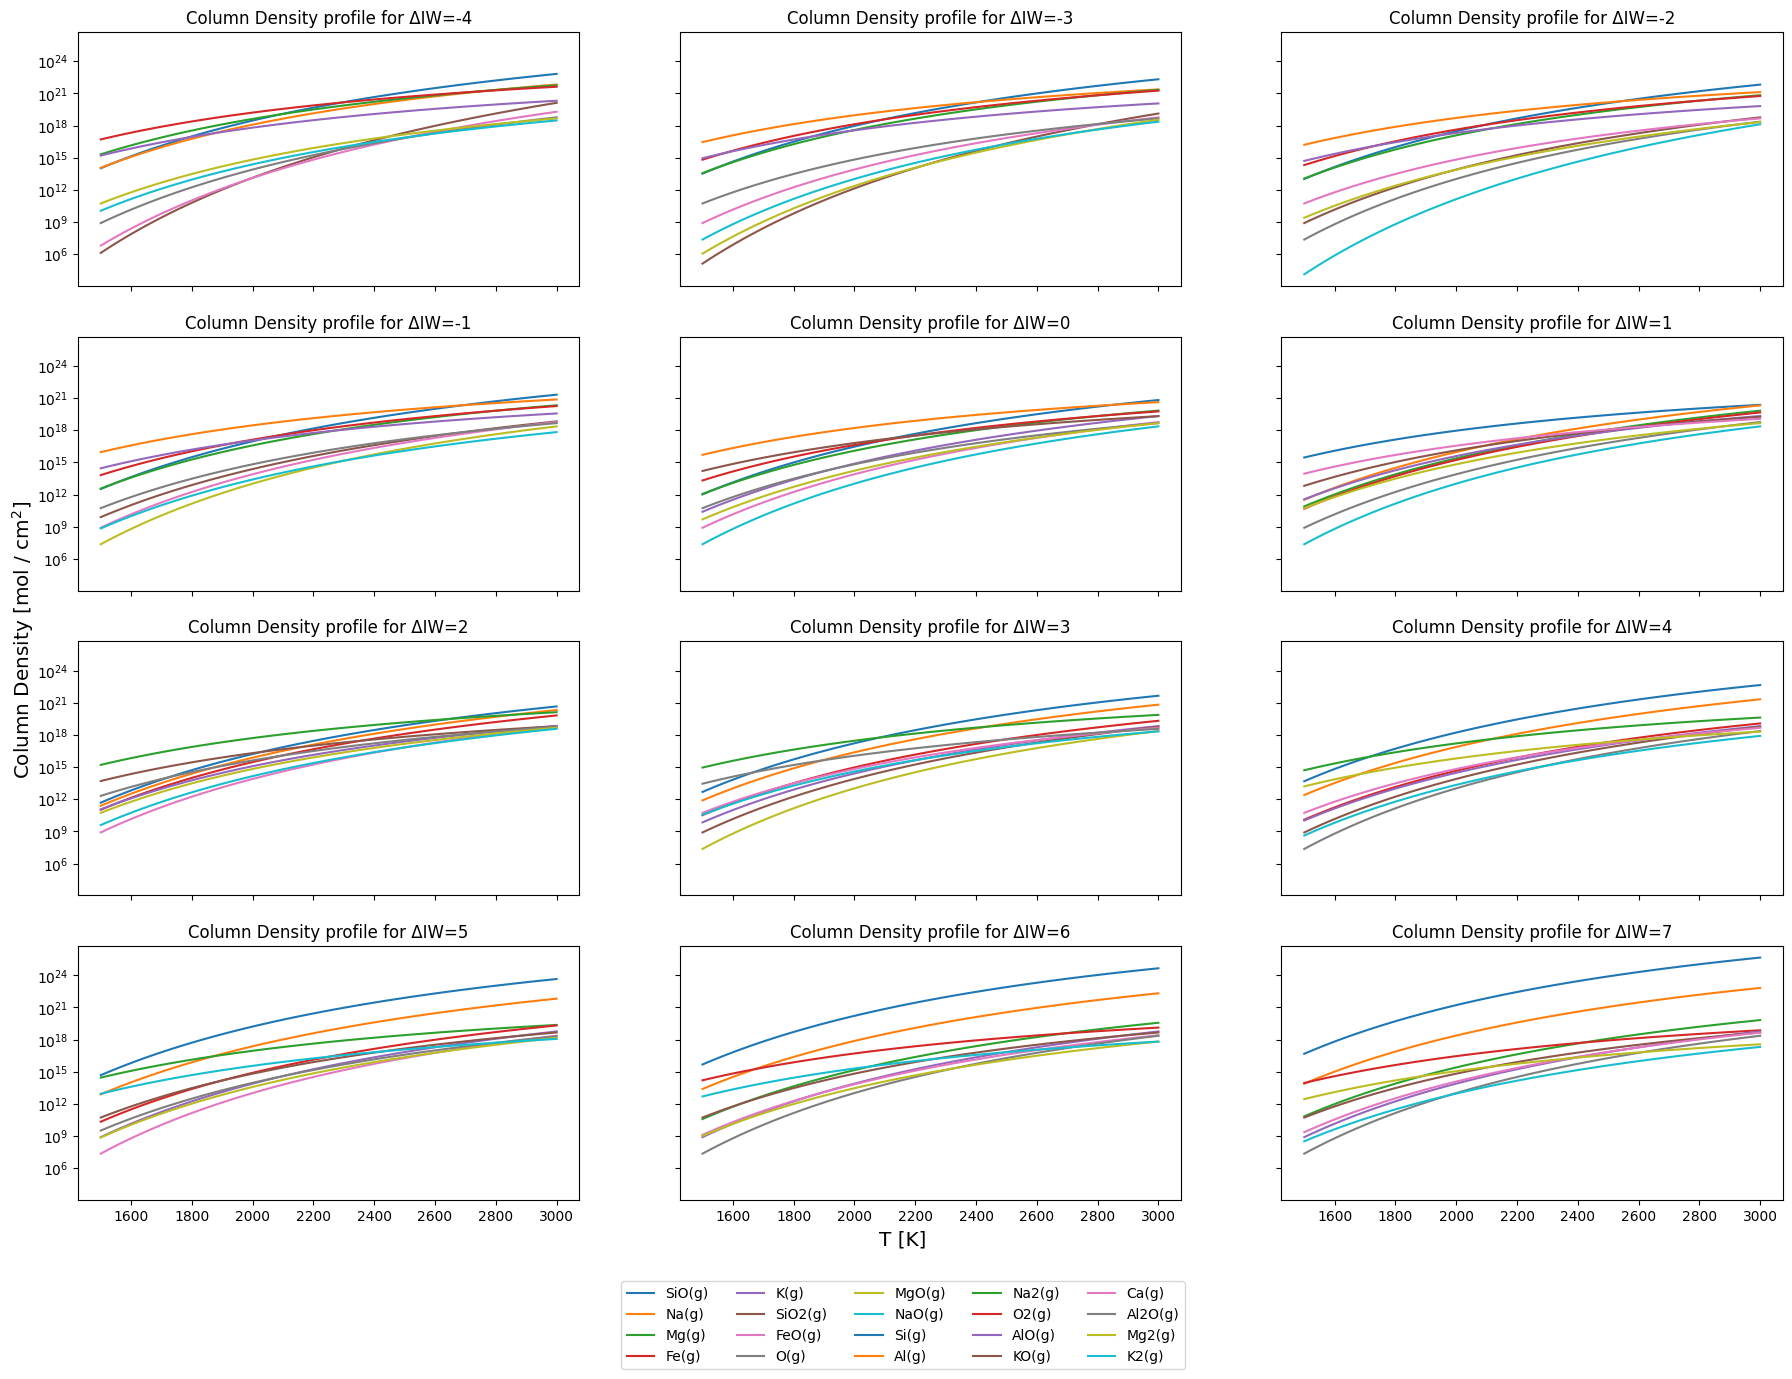

In [140]:

fig , axes = plt.subplots(nrows=4,ncols=3,figsize=(22,16),sharex=True,sharey=True)
axes = axes.flatten()
#cmap=plt.cm,get_cmap('jet',len(dlogfO2))
elements=['O(g)', 'O2(g)', 'Mg(g)', 'MgO(g)', 'Mg2(g)', 'Ca(g) ', 'CaO(g)', 'Ca2(g)', 'Al(g) ', 'AlO(g)', 'AlO2(g)', 'Al2(g)', 'Al2O(g)', 'Al2O2(g)', 'Si(g) ', 'SiO(g)', 'SiO2(g', 'Si2(g)', 'Si3(g)', 'Na(g) ', 'NaO(g)', 'Na2(g)', 'K(g)  ', 'KO(g) ', 'K2(g) ', 'Fe(g) ', 'FeO(g)', 'TiO(g)', 'Ti(g) ', 'TiO2(g)', 'Cr(g) ', 'CrO(g)', 'CrO2(g)', 'CrO3(g)']
#cbar = plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(0,1),cmap=plt.cm.get_cmap('jet')))
print(len(T1))
for j in range(len(dlogfO2)):
    for i in range(10):
            ax =axes[j]
            ax.semilogy(T1, density_high1[:,j,i],label=elements[i])
            #ax.set_xlabel('T  [K]')
            #ax.set_ylabel(r'Column Density [mol / cm$^2$]')
            ax.set_title( "Column Density profile for \u0394IW=" +str(dlogfO2[j]))
            #plt.colorbar(label='fO2 values')
            #print(dlogfO2[j])
#for ax in axes:
#    ax.set_xlabel('T  [K]')
#    ax.set_ylabel(r'Column Density [mol / cm$^2$]')

fig.text(0.5,0.125,'T [K]', va='center', ha='center',fontsize='x-large')
fig.text(0.1,0.5,r'Column Density [mol / cm$^2$]', rotation='vertical',va='center', ha='center',fontsize='x-large')
fig.subplots_adjust(bottom=0.15)
fig.legend(density_high.index,loc='lower center', bbox_to_anchor=(0.5,0.04),ncol=5)            
plt.savefig('column density profiles with corrected fo2.png')

In [156]:
density1.shape

(101, 12, 34)

101


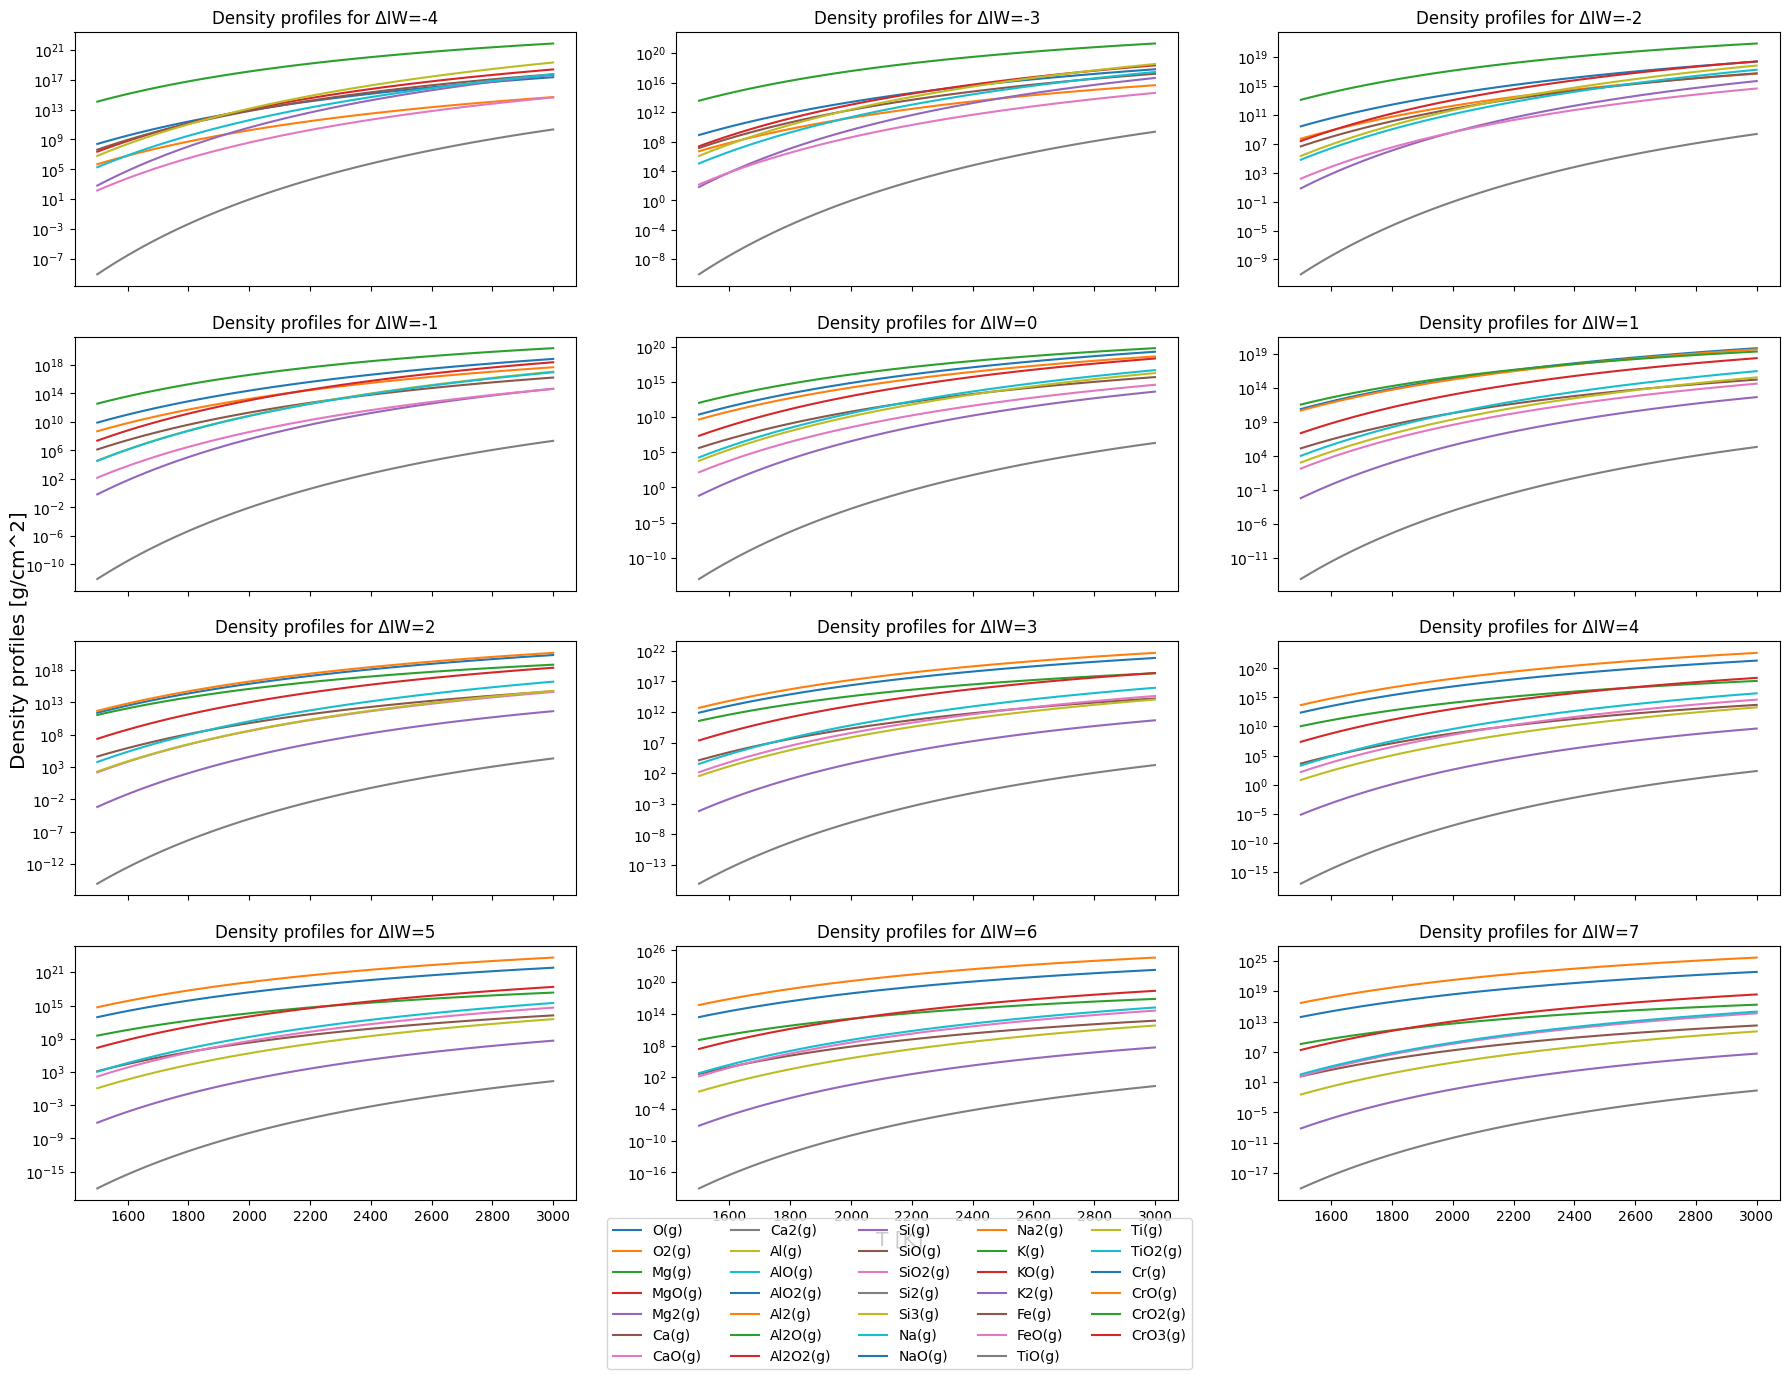

In [160]:

fig , axes = plt.subplots(nrows=4,ncols=3,figsize=(22,16),sharex=True)
axes = axes.flatten()
#cmap=plt.cm,get_cmap('jet',len(dlogfO2))
elements=['O(g)', 'O2(g)', 'Mg(g)', 'MgO(g)', 'Mg2(g)', 'Ca(g) ', 'CaO(g)', 'Ca2(g)', 'Al(g) ', 'AlO(g)', 'AlO2(g)', 'Al2(g)', 'Al2O(g)', 'Al2O2(g)', 'Si(g) ', 'SiO(g)', 'SiO2(g', 'Si2(g)', 'Si3(g)', 'Na(g) ', 'NaO(g)', 'Na2(g)', 'K(g)  ', 'KO(g) ', 'K2(g) ', 'Fe(g) ', 'FeO(g)', 'TiO(g)', 'Ti(g) ', 'TiO2(g)', 'Cr(g) ', 'CrO(g)', 'CrO2(g)', 'CrO3(g)']
#cbar = plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(0,1),cmap=plt.cm.get_cmap('jet')))
print(len(T1))
for j in range(len(dlogfO2)):
    for i in range(10):
            ax =axes[j]
            ax.semilogy(T1, density1[:,j,i])
            #ax.set_xlabel('T  [K]')
            ax.set_title( "Density profiles for \u0394IW=" +str(dlogfO2[j]))
            #plt.colorbar(label='fO2 values')
            #print(dlogfO2[j])
#ax.legend(mol_elem_frac.index,loc='center right')
fig.text(0.5,0.125,'T [K]', va='center', ha='center',fontsize='x-large')
fig.text(0.1,0.5,'Density profiles [g/cm^2]', rotation='vertical',va='center', ha='center',fontsize='x-large')
fig.subplots_adjust(bottom=0.15)
fig.legend(density.index,loc='lower center', bbox_to_anchor=(0.5,0.04),ncol=5)            
#plt.savefig('column density profiles with corrected fo2.png')
plt.savefig('Density profiles with corrected fo2.png')

101


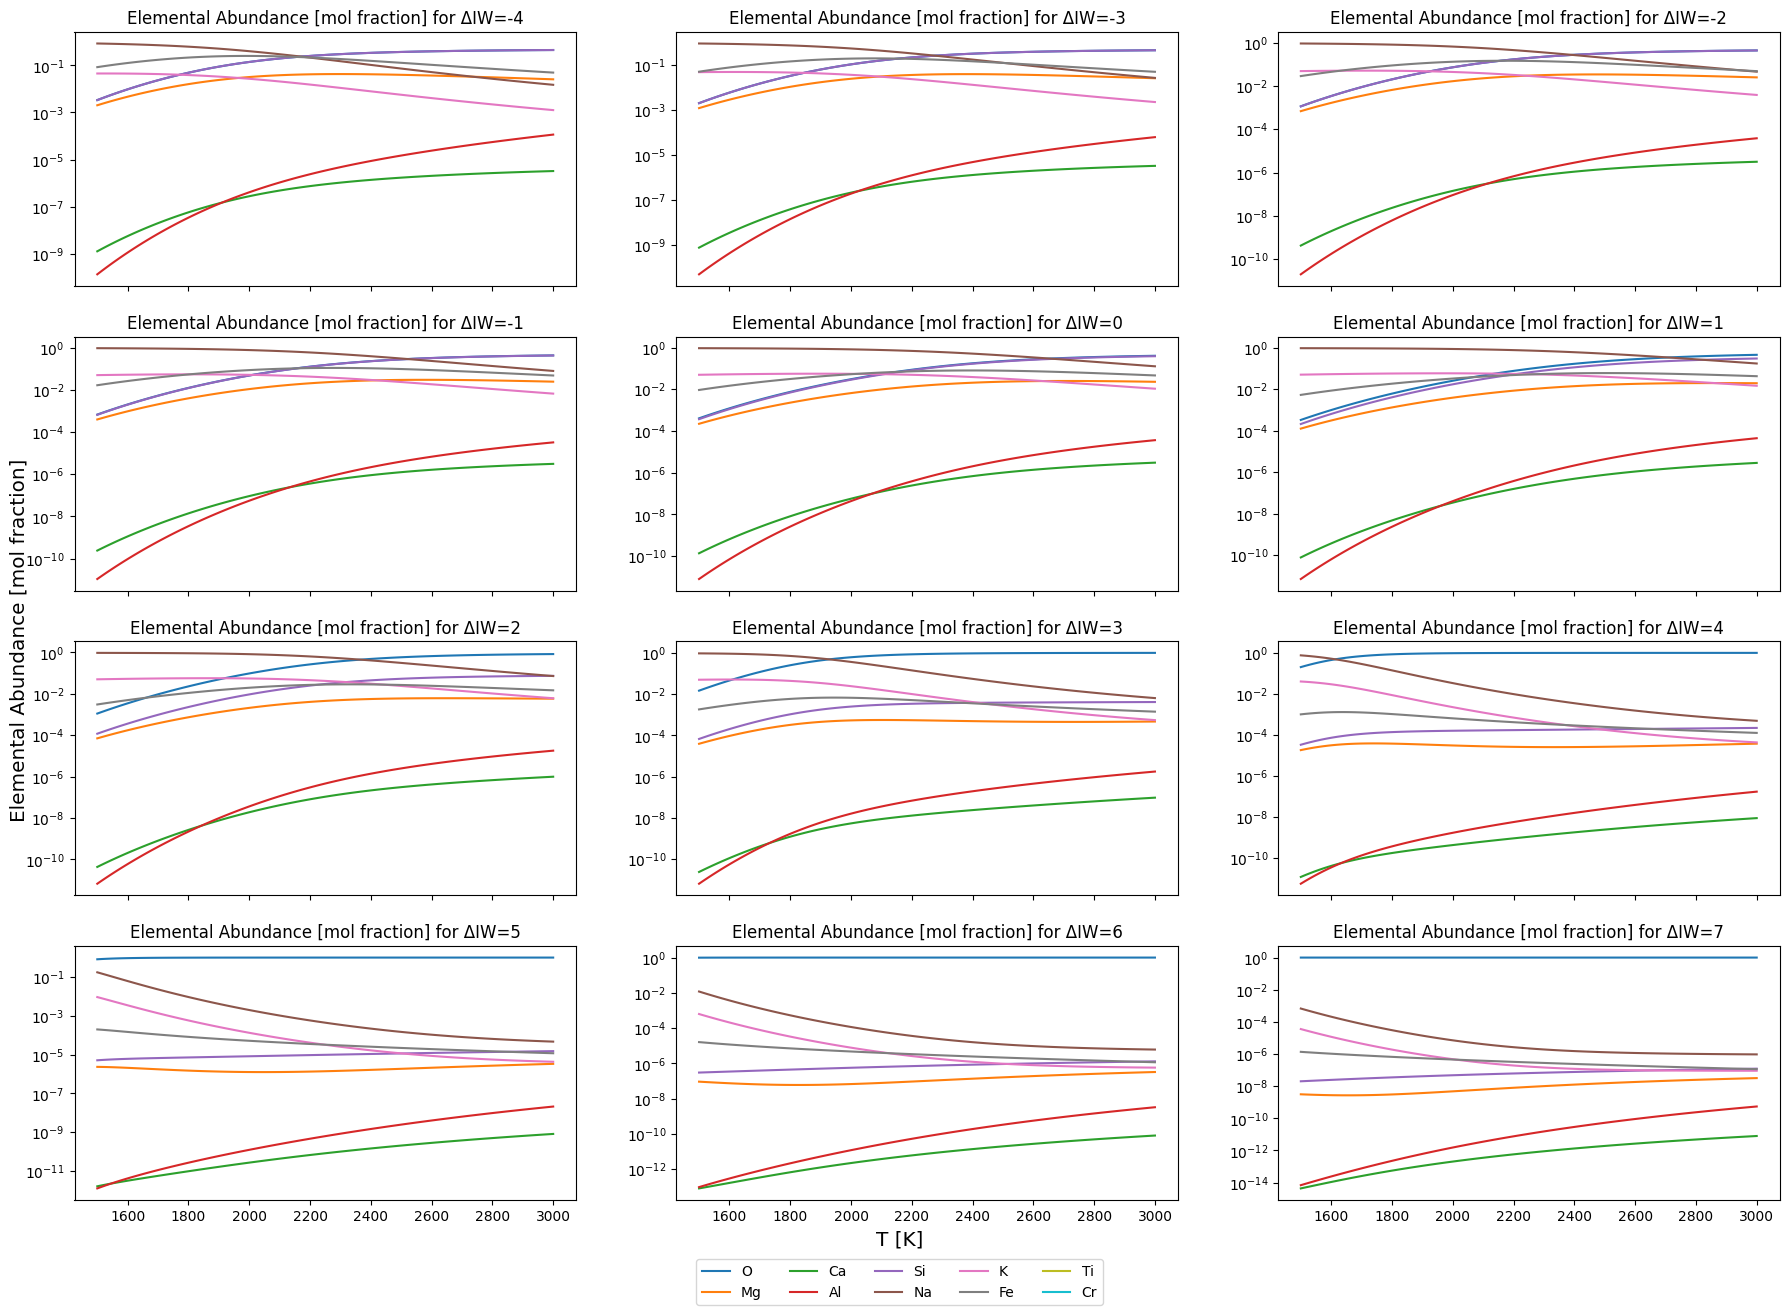

In [151]:
fig , axes = plt.subplots(nrows=4,ncols=3,figsize=(22,16),sharex=True)
axes = axes.flatten()
#cmap=plt.cm,get_cmap('jet',len(dlogfO2))
elements=['O(g)', 'O2(g)', 'Mg(g)', 'MgO(g)', 'Mg2(g)', 'Ca(g) ', 'CaO(g)', 'Ca2(g)', 'Al(g) ', 'AlO(g)', 'AlO2(g)', 'Al2(g)', 'Al2O(g)', 'Al2O2(g)', 'Si(g) ', 'SiO(g)', 'SiO2(g', 'Si2(g)', 'Si3(g)', 'Na(g) ', 'NaO(g)', 'Na2(g)', 'K(g)  ', 'KO(g) ', 'K2(g) ', 'Fe(g) ', 'FeO(g)', 'TiO(g)', 'Ti(g) ', 'TiO2(g)', 'Cr(g) ', 'CrO(g)', 'CrO2(g)', 'CrO3(g)']
#cbar = plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(0,1),cmap=plt.cm.get_cmap('jet')))
print(len(T1))
for j in range(len(dlogfO2)):
    for i in range(10):
            ax =axes[j]
            ax.semilogy(T1, mol_elem_frac1[:,j,i],label=elements[i])
            ax.set_title( "Elemental Abundance [mol fraction] for \u0394IW=" +str(dlogfO2[j]))
            #plt.colorbar(label='fO2 values')
            #print(dlogfO2[j])
fig.text(0.5,0.125,'T [K]', va='center', ha='center',fontsize='x-large')
fig.text(0.1,0.5,'Elemental Abundance [mol fraction]', rotation='vertical',va='center', ha='center',fontsize='x-large')
fig.subplots_adjust(bottom=0.15)
fig.legend(mol_elem_frac.index,loc='lower center', bbox_to_anchor=(0.5,0.08),ncol=5)      
plt.savefig('Elemental abudances profiles with corrected fo2.png')

(101, 12)


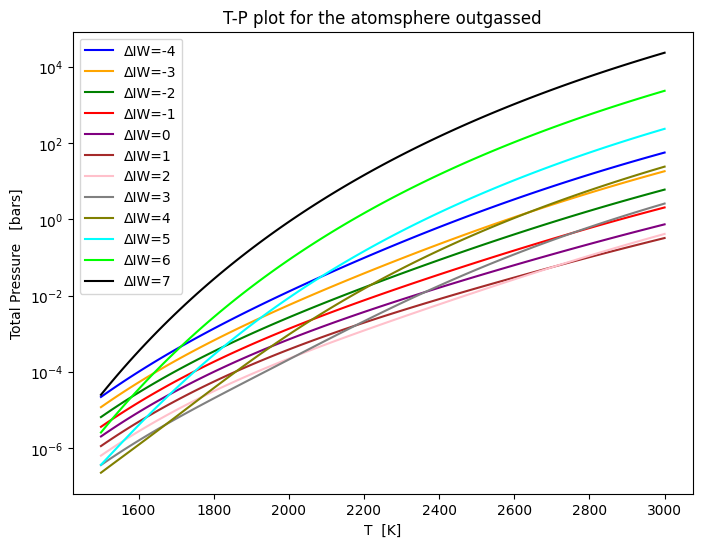

In [170]:
fig , axes = plt.subplots(nrows=1,ncols=1,figsize=(8,6),sharex=True)
#axes = axes.flatten()
#cmap=plt.cm,get_cmap('jet',len(dlogfO2))
colors=['blue','orange','green','red','purple','brown','pink','gray','olive','cyan','lime','black']
for i in range(len(dlogfO2)):
    #cbar = plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(0,1),cmap=plt.cm.get_cmap('jet')))
    axes.semilogy(T1, Ptotal1[:,i], color=colors[i],linestyle='-',label='\u0394IW='+str(dlogfO2[i]))
    axes.set_xlabel('T  [K]')
    axes.set_ylabel('Total Pressure   [bars]')
    axes.set_title('T-P plot for the atomsphere outgassed')
    axes.legend()
#plt.colorbar(label='fO2 values')
print(Ptotal1.shape)

101


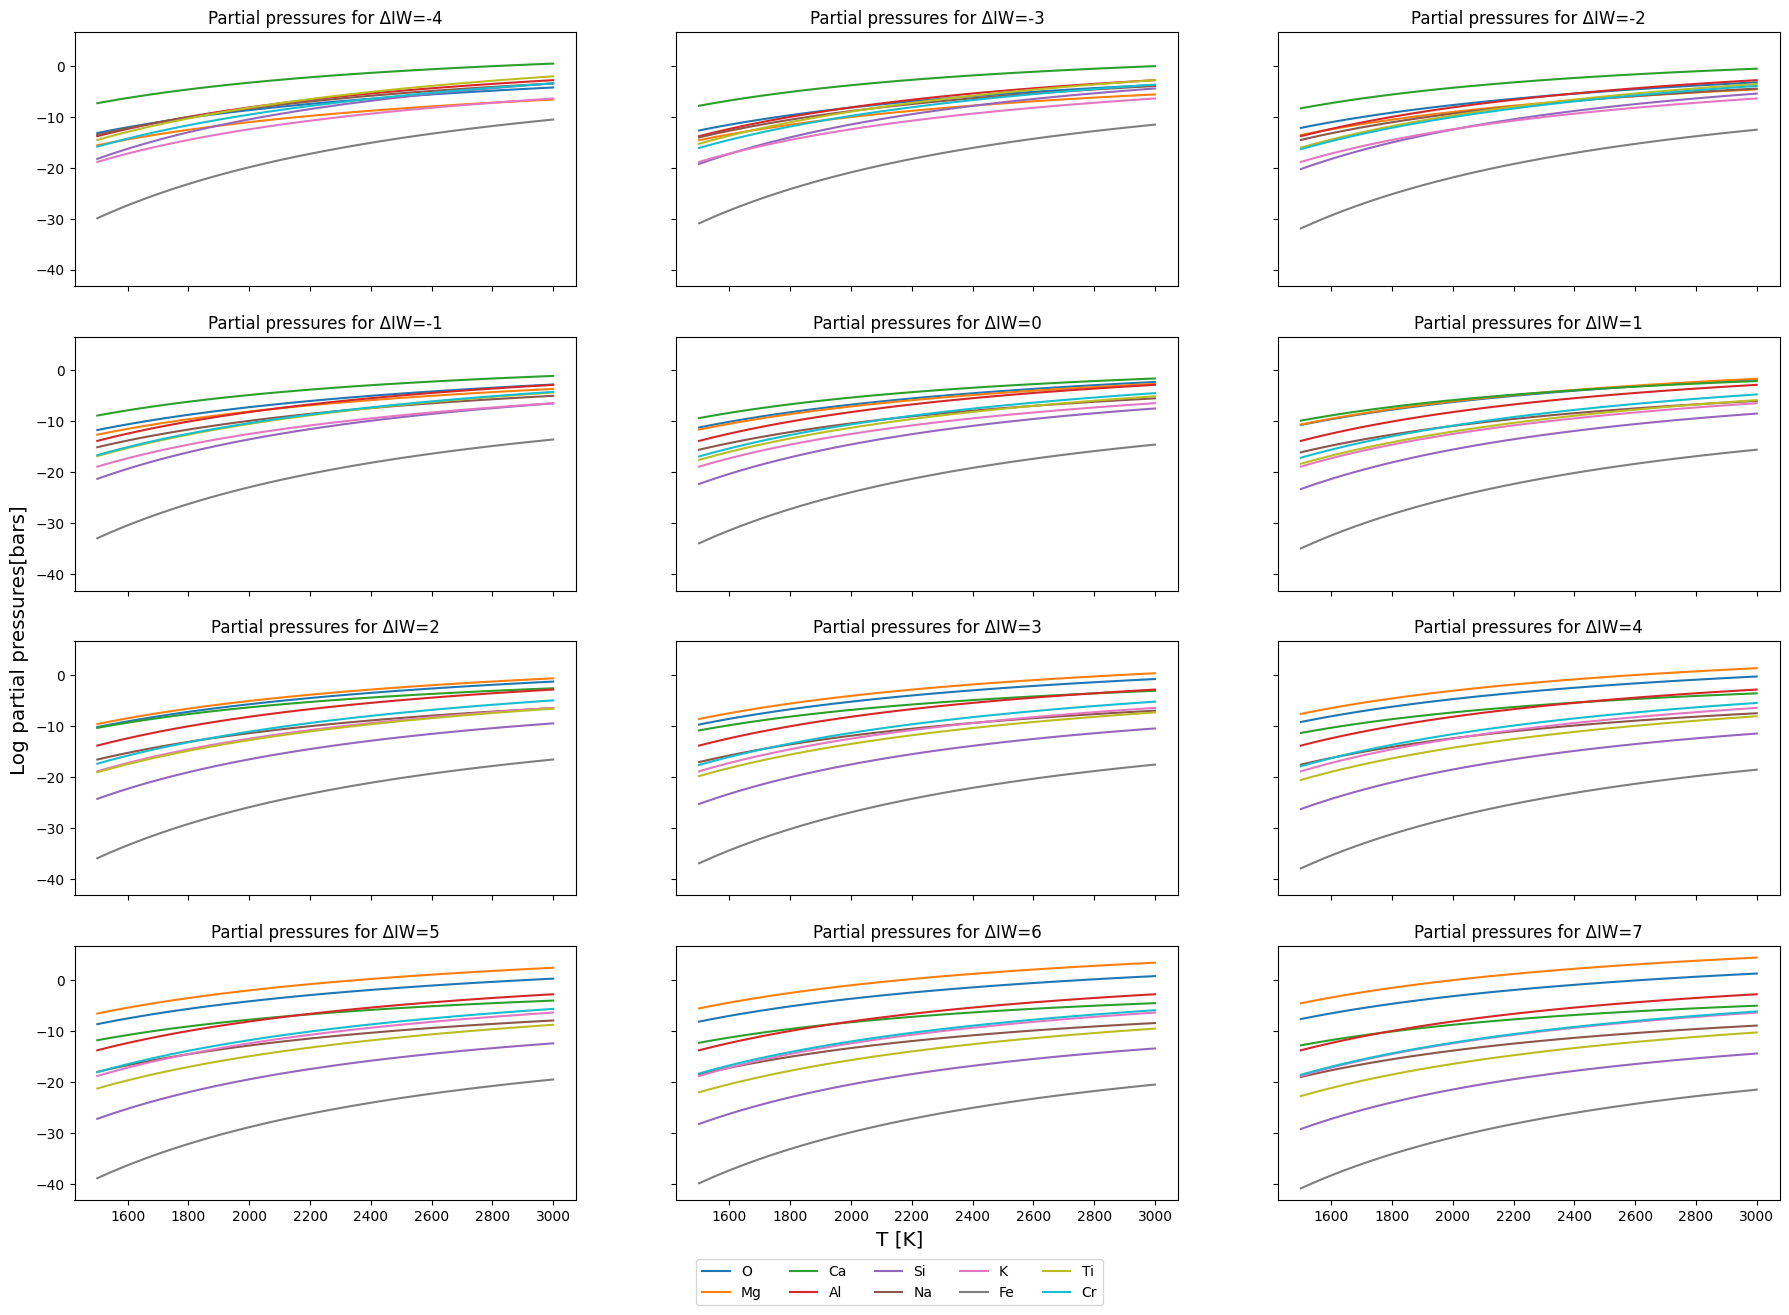

In [168]:
fig , axes = plt.subplots(nrows=4,ncols=3,figsize=(22,16),sharex=True,sharey=True)
axes = axes.flatten()
#cmap=plt.cm,get_cmap('jet',len(dlogfO2))
#elements=['O(g)', 'O2(g)', 'Mg(g)', 'MgO(g)', 'Mg2(g)', 'Ca(g) ', 'CaO(g)', 'Ca2(g)', 'Al(g) ', 'AlO(g)', 'AlO2(g)', 'Al2(g)', 'Al2O(g)', 'Al2O2(g)', 'Si(g) ', 'SiO(g)', 'SiO2(g', 'Si2(g)', 'Si3(g)', 'Na(g) ', 'NaO(g)', 'Na2(g)', 'K(g)  ', 'KO(g) ', 'K2(g) ', 'Fe(g) ', 'FeO(g)', 'TiO(g)', 'Ti(g) ', 'TiO2(g)', 'Cr(g) ', 'CrO(g)', 'CrO2(g)', 'CrO3(g)']
#cbar = plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(0,1),cmap=plt.cm.get_cmap('jet')))
print(len(T1))
for j in range(len(dlogfO2)):
    for i in range(10):
            ax =axes[j]
            ax.plot(T1, LOGP1[:,j,i])
            #ax.set_xlabel('T  [K]')
            ax.set_title( "Partial pressures for \u0394IW=" +str(dlogfO2[j]))
            #plt.colorbar(label='fO2 values')
            #print(dlogfO2[j])
#ax.legend(mol_elem_frac.index,loc='center right')
fig.text(0.5,0.125,'T [K]', va='center', ha='center',fontsize='x-large')
fig.text(0.1,0.5,'Log partial pressures[bars]', rotation='vertical',va='center', ha='center',fontsize='x-large')
fig.subplots_adjust(bottom=0.15)
fig.legend(mol_elem_frac.index,loc='lower center', bbox_to_anchor=(0.5,0.08),ncol=5)      
plt.savefig('Partial pressures with corrected fo2.png')